<a href="https://www.kaggle.com/code/mcadriaans/germany-population-prospects?scriptVersionId=181818268" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wpp2022-demographic-indicators/WPP2022_Demographic_Indicators.csv


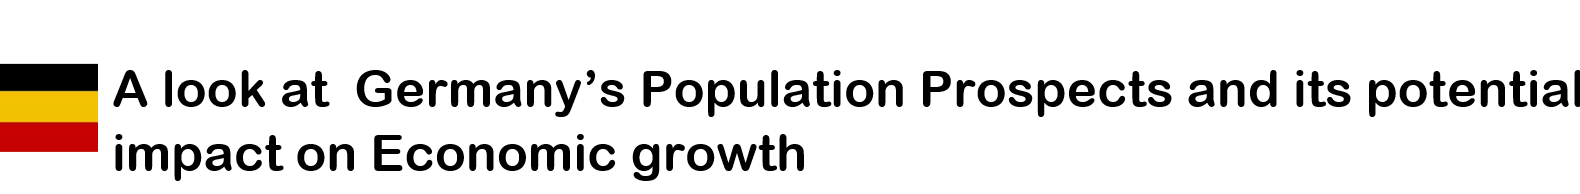


<div style="background-color:#CCD1D1; color: black; padding: 10px;">
    <h1 style="text-align: center; font-size: 40px;"> Dependencies </h1>
</div>

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Data Manipulation
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [4]:
import plotly.io as pio
#themes = ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"]
pio.templates.default = 'seaborn'


<div style="background-color:#CCD1D1; color: black; padding: 10px;">
    <h1 style="text-align: center; font-size: 40px;">  Understanding the Data </h1>
</div>

In [5]:
# Load the data
data = pd.read_csv('/kaggle/input/wpp2022-demographic-indicators/WPP2022_Demographic_Indicators.csv', low_memory=False )
data.head()

,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,...,Q0060Male,Q0060Female,Q1550,Q1550Male,Q1550Female,Q1560,Q1560Male,Q1560Female,NetMigrations,CNMR
0,1,900,NaN,NaN,NaN,1.0,1,World,0,World,...,580.7496,498.0396,240.3164,271.6253,208.1916,378.6968,430.2594,324.9308,0.0,0.0
1,1,900,NaN,NaN,NaN,1.0,1,World,0,World,...,566.7283,490.1993,231.1772,258.0905,203.7797,368.3186,415.8362,319.3364,0.0,0.0
2,1,900,NaN,NaN,NaN,1.0,1,World,0,World,...,546.3173,477.2639,218.6745,240.0344,197.1422,353.0546,395.5327,309.9103,0.0,0.0
3,1,900,NaN,NaN,NaN,1.0,1,World,0,World,...,535.8289,469.5325,212.8720,232.6019,193.0492,345.0826,385.8433,303.9053,0.0,0.0
4,1,900,NaN,NaN,NaN,1.0,1,World,0,World,...,523.1236,458.4842,205.7622,224.0498,187.4439,335.4420,374.6576,295.9944,0.0,0.0


In [6]:
# Display dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43472 entries, 0 to 43471
Data columns (total 67 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SortOrder               43472 non-null  int64  
 1   LocID                   43472 non-null  int64  
 2   Notes                   11552 non-null  object 
 3   ISO3_code               36024 non-null  object 
 4   ISO2_code               35872 non-null  object 
 5   SDMX_code               42864 non-null  float64
 6   LocTypeID               43472 non-null  int64  
 7   LocTypeName             43472 non-null  object 
 8   ParentID                43472 non-null  int64  
 9   Location                43472 non-null  object 
 10  VarID                   43472 non-null  int64  
 11  Variant                 43472 non-null  object 
 12  Time                    43472 non-null  int64  
 13  TPopulation1Jan         43472 non-null  float64
 14  TPopulation1July        43186 non-null

In [7]:
# Display the unique Locations
data['Location'].unique()[0:10]

array(['World', 'Sub-Saharan Africa', 'Northern Africa and Western Asia',
       'Central and Southern Asia', 'Eastern and South-Eastern Asia',
       'Latin America and the Caribbean',
       'Oceania (excluding Australia and New Zealand)',
       'Australia/New Zealand', 'Europe and Northern America',
       'More developed regions'], dtype=object)

In [8]:
# Check for duplicates
data.duplicated().sum()

0

In [9]:
# Are there any missing values in the dataset?
data.isnull().any().any()

True

In [10]:
# Show missing values for each column
data.isnull().sum()

SortOrder            0
LocID                0
Notes            31920
ISO3_code         7448
ISO2_code         7600
                 ...  
Q1560              286
Q1560Male          286
Q1560Female        286
NetMigrations      286
CNMR               286
Length: 67, dtype: int64

In [11]:
# Select only certain columns of interest for further analysis
df = data[['Time', 'Location','ISO2_code', 'TPopulation1Jan', 'TPopulation1July', 'TPopulationMale1July',
       'TPopulationFemale1July', 'PopDensity', 'PopSexRatio', 'MedianAgePop',
       'NatChange', 'NatChangeRT', 'PopChange', 'PopGrowthRate',
       'Births', 'Births1519', 'CBR', 'TFR', 'NRR', 'MAC',
       'SRB', 'Deaths', 'DeathsMale', 'DeathsFemale', 'CDR', 'LEx', 'LExMale',
       'LExFemale', 'LE15', 'LE15Male', 'LE15Female', 'LE65', 'LE65Male',
       'LE65Female', 'LE80', 'LE80Male', 'LE80Female', 'InfantDeaths', 'IMR',
       'LBsurvivingAge1', 'Under5Deaths', 'Q5', 'Q0040', 'Q0040Male',
       'Q0040Female', 'Q0060', 'Q0060Male', 'Q0060Female', 'Q1550',
       'Q1550Male', 'Q1550Female', 'Q1560', 'Q1560Male', 'Q1560Female',
       'NetMigrations', 'CNMR']]
df.shape

(43472, 56)

In [12]:
# Create a new column that computes the total population that migrated
df.loc[:, 'TPopulation1July_migrated'] = (df['TPopulation1July'] * (df['CNMR']/1000))* 1000

<div style="background-color:#CCD1D1; color:#212F3D; padding: 10px;">
    <h1 style="text-align: center;  font-size: 40px;">Temporal Analysis </h1>
</div>


In [13]:
# Filter for Germany and time perios 1950 - 2025 (75 year period)
df_deu = df[(df['Location'] == 'Germany') & (df['Time'] <= 2025)]
df_deu.shape

(76, 57)

In [14]:
df_deu.head()

,Time,Location,ISO2_code,TPopulation1Jan,TPopulation1July,TPopulationMale1July,TPopulationFemale1July,PopDensity,PopSexRatio,MedianAgePop,...,Q0060Female,Q1550,Q1550Male,Q1550Female,Q1560,Q1560Male,Q1560Female,NetMigrations,CNMR,TPopulation1July_migrated
29184,1950,Germany,DE,71077.882,70964.095,32442.329,38521.766,203.5922,84.2182,33.4188,...,181.8154,73.7736,91.5401,59.3060,162.5962,206.8157,127.0085,-628.332,-8.815,-625548.497425
29185,1951,Germany,DE,70850.308,70820.042,32487.864,38332.177,203.1789,84.7535,33.4249,...,178.1775,73.3617,90.8595,58.8927,161.6784,205.4466,126.1669,-428.945,-6.039,-427682.233638
29186,1952,Germany,DE,70789.775,70808.373,32577.363,38231.010,203.1454,85.2119,33.1685,...,174.6893,72.9295,90.1871,58.4843,160.8025,204.0892,125.3329,-308.576,-4.349,-307945.614177
29187,1953,Germany,DE,70826.971,70879.443,32691.840,38187.602,203.3493,85.6085,33.0715,...,171.3436,72.4756,89.5226,58.0806,159.9644,202.7433,124.5065,-225.182,-3.172,-224829.593196
29188,1954,Germany,DE,70931.914,71020.731,32829.237,38191.494,203.7547,85.9596,33.2287,...,168.1333,72.0036,88.8659,57.6816,159.1694,201.4089,123.6875,-144.522,-2.033,-144385.146123


In [15]:
# Check if there are any missing values
df_deu.isnull().any().any()

False

In [16]:
df_deu.describe()

,Time,TPopulation1Jan,TPopulation1July,TPopulationMale1July,TPopulationFemale1July,PopDensity,PopSexRatio,MedianAgePop,NatChange,NatChangeRT,...,Q0060Female,Q1550,Q1550Male,Q1550Female,Q1560,Q1560Male,Q1560Female,NetMigrations,CNMR,TPopulation1July_migrated
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,...,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,1987.500000,78537.861658,78617.412145,37716.667697,40900.744618,225.549146,92.118913,37.735176,2.991329,0.157553,...,98.096026,50.188508,64.909274,35.571418,115.506000,150.725063,82.399132,156.109579,1.913303,156527.432971
std,22.083176,3744.816774,3710.775594,2548.758781,1201.057996,10.646017,3.795074,4.341660,228.952283,3.032107,...,40.362568,17.125722,21.351753,14.001817,33.206368,42.837299,27.222088,201.301774,2.614499,201422.400666
min,1950.000000,70789.775000,70808.373000,32442.329000,38187.602000,203.145400,84.218200,32.948400,-276.272000,-3.319000,...,45.493900,21.654300,27.731400,15.284000,59.205200,75.535300,42.330800,-628.332000,-8.815000,-625548.497425
25%,1968.750000,77522.494250,77567.945000,36796.546750,40648.457000,222.538300,89.476225,33.714375,-154.752250,-1.932250,...,60.510025,32.708300,43.170325,21.835500,82.269800,107.922450,55.828550,59.274000,0.727500,59294.581012
50%,1987.500000,78667.466000,78655.511000,37476.495500,41354.525000,225.658500,91.836500,36.173000,-102.702500,-1.294000,...,87.231100,51.007300,67.955800,33.201350,119.100350,158.615100,77.940100,155.428500,1.873500,155596.708493
75%,2006.250000,81419.605750,81437.921750,39654.351500,41727.780250,233.641050,95.042425,41.696450,167.831250,2.158000,...,132.117900,65.749725,84.227725,48.401925,145.615450,190.033300,109.295750,306.333750,3.791750,306908.299309
max,2025.000000,83426.789000,83408.554000,41153.991000,42254.563000,239.294700,97.589100,45.131100,479.375000,6.363000,...,181.815400,73.773600,91.540100,59.306000,162.596200,206.815700,127.008500,482.849000,6.071000,484477.869148


<div style="padding: 10px;">
    <h2 style="text-align: center;  font-size: 36px;">Population Dynamics </h2>
</div>

<font size=4> Population dynamics refers to the ways in which a population changes over time, and these changes can be driven by a variety of factors including birth rates, death rates, immigration, and emigration, all of which contribute to population growth or decline.

<div style="background-color:#778899; color:white; padding: 15px;">
    <h3 style="text-align: center;  font-size: 32px;">Population Growth </h3>
</div>



<div style="background-color:lightgray; color:darkslategray; padding: 15px;">
    <h4 style="text-align: center;  font-size: 28px;">Natural Change Rate (NCR) </h4>
</div>


<font size=4>The Natural Change Rate is a key demographic indicator that directly influences population growth and is based solely on births and deaths, excluding the impact of migration. An NCR of 6.5 signifies that for every 1,000 individuals in a population, there are approximately 6.5 more births than deaths in a given year.
    

In [17]:
# Create a line plot
fig = px.line(df_deu, x='Time', y ='NatChangeRT')

# Update Layout
fig.update_layout(
    autosize = False,
    title = dict(
        text = 'Germany: Rate of Natural Change 1950-2025',
        x = 0.4,
        y = 0.93
    ),
    xaxis_title = 'Year',
    yaxis_title = 'Natural Change Rate'
)
# Update hover template for all traces
fig.update_traces(
    hovertemplate = 'Year: %{x}<br>National Change Rate: %{y}</br>'
)

# Display plot
fig.show()

<font size = 5 color = darkslategray><b><u>Observations</u></b>

* <font size = 4>There is a significant decline in the Natural Change Rate around 1970.</font>
* <font size = 4>From 1975 and the following years we see the rate fluctuates but the NCR remains negative ( The number of deaths are exceeding the number of births)</font>
* <font size = 4>There is a noticeable decline during the pandemic.</font>
* <font size = 4>It is projected that in 2024, the number of deaths will surpass the number of births by 2.44 for every 1000 individuals.The population is shrinking.</font>


    
<font size = 4 color = darkred><i>The Natural Change Rate (NCR) can greatly influence a country’s economic growth. A positive NCR can expand the workforce and taxpayer base, potentially driving economic growth. It can also stimulate demand, innovation, and productivity due to population growth. However, the reverse is true for a negative NCR.</i></font>

<div style="background-color:lightgray; color:darkslategray; padding: 15px;">
    <h4 style="text-align: center;  font-size: 28px;">Crude Net Migration Rate (CNMR) </h4>
</div>


<font size=4>The Crude Net Migration Rate (CNMR), a key demographic indicator, measures the net change in a population’s size resulting from migration. It is calculated as the difference between the number of incoming individuals (immigrants) and outgoing individuals (emigrants) per 1,000 members of the population. A positive CNMR signifies a net influx of people and  a negative CNMR indicates a net outflow. </font>

<font size=4>This metric offers valuable insights into demographic shifts and socio-economic trends, playing a crucial role in understanding a country’s population dynamics. It’s particularly useful when assessing the impact of migration on a nation’s population structure and growth.</font>

In [18]:
# Define a color function based on the CNMR value
def color(cnmr):
    if cnmr < 0:
        return 'red'
    else:
        return 'green'

# Apply the color function to the CNMR column to get the colors
cnmr_colors = df_deu['CNMR'].apply(color)

# Create the bar plot with the specified colors
fig = px.bar(df_deu, x='Time', y='CNMR', color=cnmr_colors, color_discrete_map='identity')

# Update Layout
fig.update_layout(
    autosize=False,
    title=dict(
        text='Germany: Crude Net Migration Rate (1950-2025)',
        x=0.43,
        y=0.93
    ),
    xaxis_title='Year',
    yaxis_title='CNMR'
)

# Update hover template for all traces
fig.update_traces(
    hovertemplate='Year: %{x}<br>CNMR: %{y}</br>'
)

# Show the plot
fig.show()

<font size = 5 color = darkslategray><b><u>Observations</u></b></font>

* <font size = 4>Before 1958 more people were leaving Germany than coming into Germany.</font>
* <font size = 4>1990 shows the highest CNMR over the 75 years; there was a net increase of approximately 6.066 people for every 1000 people in the population due to migration.</font>
* <font size = 4>From 1981 onwards more people are immigrating to Germany with visible peaks in 1990, 1991, 2016 and 2017
* <font size = 4>2024 shows a CNMR of 1.875 which means that based on the data set, approximately  156 123 people will migrate to Germany in 2024.</font>

<font size = 4 color = darkred><i>A positive CNMR change can boost the labor pool, providing businesses with a wider range of potential employees. This is particularly beneficial for sectors facing skill shortages. The economy can be strengthened by the labor, spending, and tax contributions of migrants, thereby promoting overall economic growth..</i></font>

<div style="background-color:#778899; color:white; padding: 10px;">
    <h3 style="text-align: center;  font-size: 32px;">Life Expectancy </h3>
</div>

<font size=4>Life expectancy is another key component of population dynamics .Life expectancy is the average number of years a newborn is expected to live, based on current age-specific mortality rates.It is a measure of a population’s overall health and quality of life, and a long life expectancy is often associated with superior healthcare, nutrition, and living conditions.</font>

In [19]:
# Create line plot showing both male and female life expectancy
fig = go.Figure()
fig.add_trace(go.Scatter(x = df_deu['Time'], y = df_deu['LExFemale'],
                         mode ='lines+markers', name ='Female',
                        line = dict(color ='fuchsia')))
fig.add_trace(go.Scatter(x = df_deu['Time'], y = df_deu['LExMale'],
                         mode='lines+markers', name='Male',
                        line = dict(color='turquoise')))



# Update Layout
fig.update_layout(
    autosize = False,
    title = dict(
        text = 'Germany: Life Expectancy Females vs Males (1950-2025)',
        x = 0.48,
        y = 0.85
    ),
    legend = dict(
        title = ''
    ),
    xaxis_title = 'Year',
    yaxis_title = 'Life Expectancy Age'
)

# Update hover template for all traces
fig.update_traces(
    hovertemplate = 'Year: %{x}<br>Life Expectancy: %{y}</br>'
)

# Display plot
fig.show()



<font size = 5 color = darkslategray><b><u>Observations</u></b></font>

* <font size = 4>Both traces show a steady increasing trend indicating that the life expectancy for both genders has been improving over the years, which could be attributed to advancements in healthcare, nutrition, and living conditions.</font>
* <font size = 4>Over a 75-year period, female life expectancy consistently exceeds male life expectancy. This global trend, observed not just in Germany, is attributed to a combination of biological, behavioral, and societal factors.</font>
* <font size = 4>Both female and male life expectancies experienced a significant decline during the Covid-19 pandemic period.

<font size = 4 color = darkred><i>Changes in life expectancy can affect the size of the workforce, retirement ages, and economic productivity.</i></font>

<div style="background-color:#778899; color:white; padding: 10px;">
    <h3 style="text-align: center; font-size: 32px;">Net Reproductive Rate (NRR) </h3>
</div>

<font size=4>The Net Reproductive Rate (NRR) is a key element of population dynamics, providing a demographic measure that estimates the average number of daughters a woman would have during her lifetime, based on current age-specific fertility and mortality rates. This metric plays a crucial role in evaluating population growth. </font>
<font size=4>The Net Reproduction Rate (NRR) uses 1 the threshold, signifying that a woman, on average, has one daughter who reaches reproductive age, thus keeping the population stable without migration. An NRR below 1 indicates potential population decline due to insufficient reproductive capacity. Conversely, an NRR above 1 suggests population growth as the current generation is adequately replaced.</font>

<font size=4>The NRR is favored over the Total Fertility Rate (TFR) as it considers both fertility and mortality rates, providing a more holistic view of population dynamics.</font>

In [20]:
# Create a line plot
fig = px.line(df_deu, x='Time', y ='NRR')

# Add a trace for the line with hover text
fig.add_trace(
    go.Scatter(
        x = [df_deu['Time'].min(), df_deu['Time'].max()],
        y = [1, 1],
        mode = 'lines',
        line = dict(color = 'red', dash ='dash'),
        name = 'Replacement level',
        showlegend = False
    )
)

# Update Layout
fig.update_layout(
    autosize = False,
    title = dict(
        text = 'Germany: Net Reproductive Rate 1950-2025',
        x = 0.5,
        y = 0.93
    ),
    xaxis_title = 'Year',
    yaxis_title = 'Net Reproductive Rate'
)
# Update hover template for all traces
fig.update_traces(
    hovertemplate = 'Year: %{x}<br>NRR: %{y}</br>'
)

# Display plot
fig.show()

<font size = 5 color = darkslategray><b><u>Observations</u></b></font>

* <font size = 4>From 1969 onwards, NRR has consistently been below 1; the population’s reproductive capacity is not sufficient to replace the current generation, over time this results in a population decline, provided there are no significant changes in migration patterns.</font>
* <font size = 4>Based on the data in 2024, each woman in the population is expected to give birth to 0.7445 daughters who survive to reproductive age.</font>
    
<font size = 4 color = darkred><i>The Net Reproduction Rate (NRR) significantly influences a country’s economic growth. A higher NRR can boost labor force and consumer demand, stimulate innovation, and impact public services. However, a lower NRR may increase the dependency ratio, potentially slowing growth.</i></font>

<div style="background-color:#778899; color:white; padding: 10px;">
    <h3 style="text-align: center;  font-size: 32px;">Adult Mortality Rate (AMR) </h3>
</div>

<font size=4>The Adult Mortality Rate (AMR), a crucial component of population dynamics, represents the probability of dying between the ages of 15 and 60 for every 1,000 people. It provides insights into the health status and age distribution of a population. AMR has economic consequences, assists in policy formulation, and reflects societal conditions. A high AMR could suggest prevalent health problems, an older population, and possible economic difficulties.</font>

In [21]:
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=df_deu['Time'], y=df['Q1560'], fill='tozeroy', mode='none', name='Q1560'))
fig.add_trace(go.Scatter(x=df_deu['Time'], y=df['Q1560Male'], fill='tozeroy', mode='none', name='Q1560Male'))
fig.add_trace(go.Scatter(x=df_deu['Time'], y=df['Q1560Female'], fill='tozeroy', mode='none', name='Q1560Female'))

# Update Layout
fig.update_layout(
    autosize = False,
    title = dict(
        text = 'Germany: Adult Mortality Rate (1950-2025)',
        x = 0.4,
        y = 0.85
    ),
    xaxis_title = 'Year',
    yaxis_title = 'AMR'
)


fig.show()

<font size = 5 color = darkslategray><b><u>Observations</u></b></font>
* <font size = 4> The overlapping of the two areas indicates similar declining trends but different magnitudes of AMR for males and females.</font>
* <font size = 4>Overall, the declining AMR inidcates there is an improvement in adult life expectancy or health conditions in Germany.</font>
    
<font size = 4 color = darkred><i>High adult mortality rates can have significant economic impacts. The loss of individuals aged 15 to 60, considered the prime working age, can hinder societal productivity and impede economic progress</i></font>

<div style="background-color:#778899; color:white; padding: 10px;">
    <h3 style="text-align: center;  font-size: 32px;">Population Sex Ratio (PSR) </h3>
</div>

In [22]:
# Create a line plot
fig = px.scatter(df_deu, x='Time', y='PopSexRatio', labels={'PopSexRatio':'PSR', 'Time':'Year'})

# Update Layout
fig.update_layout(
    autosize = False,
    title = dict(
        text = 'Germany: Population Sex Ratio (1950-2025)',
        x = 0.4,
        y = 0.93
    ),
    xaxis_title = 'Year',
    yaxis_title = 'PSR'
)

# Display plot
fig.show()

<font size = 5 color = darkslategray><b><u>Observations</u></b></font>
    
* <font size = 4>There is a steady rise in Germany’s PSR from about 84 in 1950 to nearly 98 by 2025, indicating an increasing male-to-female ratio. If this trend persists, gender parity will be achieved, which is crucial for sustainable population growth.</font>
    
<font size = 4 color = darkred><i>Balanced sex ratios can contribute to economic stability. For instance, having a similar number of men and women can help ensure that both genders have equal opportunities to contribute to the economy, and a more harmonious, productive, and sustainable society.</i></font>

<div style="background-color:#CCD1D1; color: black; padding: 10px;">
    <h1 style="text-align: center; font-size: 40px;"> Conclusion </h1>
</div>

<font size=4>Germany’s population dynamics over a 75-year span reveal significant trends that could have profound implications for the country’s economic growth. The observed negative Natural Change rate, indicating more deaths than births, coupled with a Net Reproductive Rate below the replacement level for the past 55 years, signifies an aging population. This trend is further exacerbated by the increasing life expectancy, which is currently at 84 for females and 80 for males.</font>

<font size=4>The Crude Net Migration Rate, while positive, appears to be plateauing, suggesting that immigration may not sufficiently offset the declining birth rate. Furthermore, the Adult Mortality Rate is declining, indicating that life expectancy is likely to continue improving, particularly for males who currently have a higher probability of dying during their productive age.</font>

<font size=4>These demographic shifts pose significant challenges for Germany’s economy. An aging population increases the demand for healthcare and retirement benefits, putting pressure on the country’s resources. This is particularly concerning for Germany’s pension system, which is already under strain due to the increasing proportion of retirees relative to the working-age population.</font>

_________________________________________________________________________________________________________________________________________________________________